# THE SPARKS FOUNDATION

#### INTERN NAME - SHABAZ SHIRALKAR

GRIP_SEPTEMBER_2021_DATA_SCIENCE & BUSINESS_ANALYTICS INTERNSHIP

BEGINNER LEVEL TASK 1 - SIMPLE LINEAR REGRESSION

TASK-01 :- PREDICTION OF PERCENTAGE OF A STUDENT BASED ON NUMBER OF HOURS HE/SHE STUDIED. HERE, I'M USING SIMPLE LINEAR REGRESSION AS IT INVOLVES JUST TWO VARIABLES. I'VE CODED USING PYTHON AS A LANGUAGE AND JUPUTER AS AN IDE.                      

## IMPORTS
Importing pandas, numpy, matplotlib and seaborn. Then setting %matplotlib inline.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## LOAD DATASET
We're going to work on student data with two numerical value columns namely:
* Hours : NO. OF HOURS STUDENT STUDIED
* Scores : NO. OF PERCENTAGE SCORED BY A STUDENT

In [4]:
#Reading data from provided link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

### Checking the head of customers, and checking out its info() and describe() methods.

In [5]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Exploratory Data Analysis
**Let's explore the data!**

___
**Using seaborn to create a jointplot to compare the Hours and Scores columns. Does the correlation make sense?**

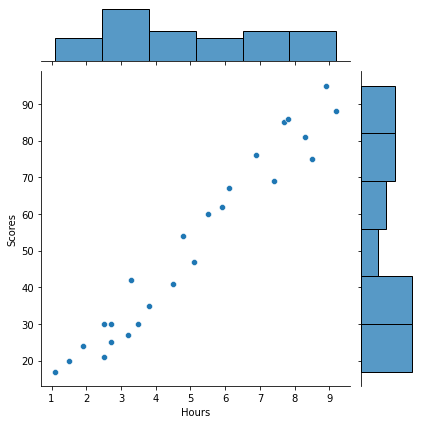

In [6]:
sns.jointplot(x='Hours',y='Scores',data=df)

**From above plot we can see that the Hours and Scores columns are highly correlated let's confirm it with python's corr() method**

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Creating a linear model plot (using seaborn's lmplot) for Hours vs. Scores for finalizing collinearity between them**

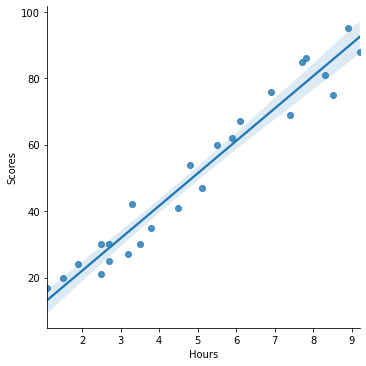

In [8]:
sns.lmplot(x='Hours',y='Scores',data=df)

As the data is highly correlated let's move forward towards training our linear model.

## Training and Testing Data
Now that we've explored the data a bit, let's go ahead and train our data.

**Setting a variable X equal to the "Hours" and a variable y equal to the "Scores" column.**

In [8]:
#Check the shape of the data
df.shape

(25, 2)

In [9]:
#collecting X and y values
x = df['Hours'].values
y = df['Scores'].values

In [10]:
#Cannot use Rank 1 Matrix in scikit-learn 
#Hence we've to reshape our data either using array.reshape(-1, 1) if our data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = x.reshape((-1,1))

**Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.2 and random_state=101**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Training the Model

Now its time to train our model on our data!

**Import LinearRegression from sklearn.linear_model**

In [13]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [14]:
lm = LinearRegression()

In [15]:
#Train/fit lm on the data.
lm.fit(X_train,y_train)

LinearRegression()

**Printing out the coefficient of the model**

In [16]:
# The coefficient
print('Coefficient: ', lm.coef_)

Coefficient:  [9.73330705]


In [17]:
#The intercept
print('Intercept: ', lm.intercept_)

Intercept:  2.512129298320076


## Predicting y
Now that we have fit our model, let's evaluate its performance by predicting off the X values!
 
** Using lm.predict() to predict off the X set of the data.**

In [18]:
y_predictions = lm.predict(X_test)

**Creating a scatterplot of the real test percentage versus the predicted percentage.**

Text(0, 0.5, 'Predicted Y')

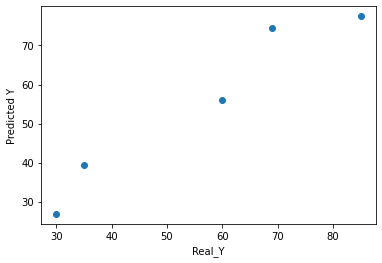

In [20]:
plt.scatter(y_test,y_predictions)
plt.xlabel('Real_Y')
plt.ylabel('Predicted Y')

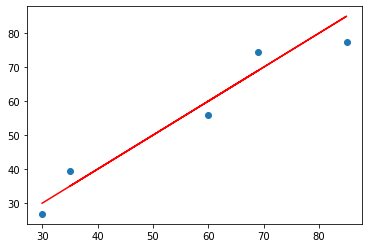

In [21]:
# Our predictions
plt.scatter(y_test,y_predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

**Predicting test data**

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})  
df 

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


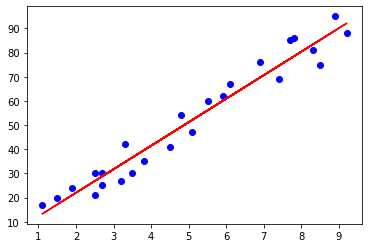

In [20]:
# Plotting the regression line
line = lm.coef_*X + lm.intercept_

# Plotting for the test data
plt.scatter(X, y, color ='blue')
plt.plot(X, line, 'r');
plt.show()

**WHAT WILL BE PREDICTED SCORE IF A STUDENT STUDIED FOR 9.25 HRS/DAY?**

In [21]:
#predicting the percentage if a student for 9.25 hours
X_new = 9.25
Y_pred = lm.predict([[X_new]])
print(Y_pred)

[92.54521954]


**HENCE IF A STUDENT STUDIED FOR 9.25 HRS/DAY ITS SCORE WILL BE 9.2**

## Evaluating the Model

Let's evaluate our model performance by calculating the explained variance score (R^2).

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))
print('MSE:', metrics.mean_squared_error(y_test, y_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

MAE: 4.937597792467706
MSE: 26.67564259705224
RMSE: 5.164846812544612


**As we can see over here on average we are off by 4.9 percent score according to MSE** 

In [23]:
#Calculating R2 Score
r2score = lm.score(X,y)
print(r2score)

0.9528747136030468
